In [21]:
import numpy as np
import scipy as sp
from scipy import signal
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [22]:
# Quantifying neighbourhood structure

In [23]:
def draw_rect(cx, cy, w, h, color='red', width=4):
    """
    Requires `import matplotlib as mpl`
    """
    ax = plt.gca()

    t, b = cy-h//2, cy+h//2
    l, r = cx-w//2, cx+w//2
       
    rect = mpl.lines.Line2D([l,l,r,r,l],[t,b,b,t,t],color=color,linewidth=width)
    ax.add_line(rect)
    return int(t), int(b), int(l), int(r)

E(-4,0) = 13.218167685669355


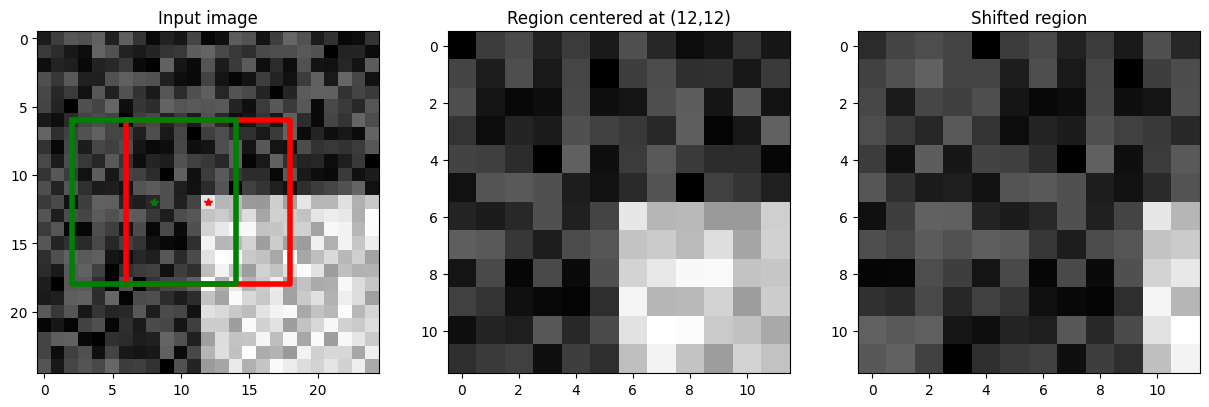

In [24]:
I = np.random.rand(25,25)*0.4 # Flat
I[12:,12:] = np.random.rand(13,13)*0.4+0.6 # Corner
#I[:,12:] = np.random.rand(25,13)*0.4+0.6 # Line
#I[0,0] = 1.0

cx, cy, w, h = 12, 12, 12, 12
u, v = -4, 0

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Input image')
plt.imshow(I, interpolation='none', cmap='gray')
t, b, l, r = draw_rect(cx, cy, w, h)
plt.plot([cx],[cx],'r*')
t_shifted, b_shifted, l_shifted, r_shifted = draw_rect(cx+u, cy+v, w, h, color='green')
plt.plot([cx+u],[cy+v],'g*')
plt.subplot(132)
plt.title('Region centered at ({},{})'.format(cx,cy))
I_region = I[t:b,l:r]
plt.imshow(I_region, interpolation='none', cmap='gray')
plt.subplot(133)
plt.title('Shifted region')
I_shifted = I[t_shifted:b_shifted,l_shifted:r_shifted]
plt.imshow(I_shifted, interpolation='none', cmap='gray')
E = np.sum(np.square(I_region - I_shifted)) # Assume w(x,y)=1.0
print('E({},{}) = {}'.format(u,v,E))

In [25]:
E = np.zeros((13,13), dtype=np.float32)
for u in np.arange(-6,7):
    for v in np.arange(-6,7):
        t, b = int(cy-h//2), int(cy+h//2)
        l, r = int(cx-w//2), int(cx+w//2)
        ts, bs, ls, rs = t+v, b+v, l+u, r+u   
        E[u+6,v+6] = np.sum(np.square(I[t:b,l:r] - I[ts:bs,ls:rs]))

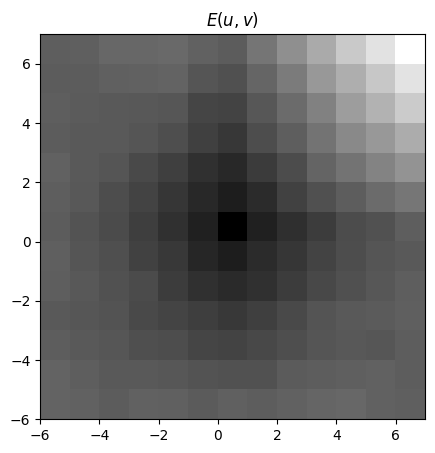

In [26]:
plt.figure(figsize=(5,5))
plt.title('$E(u,v)$')
plt.imshow(E.T, cmap='gray', origin='lower', extent=[-6, 7, -6, 7]);  # Note the transport. This is to ensure that u is the x-axis, and v is y-axis.

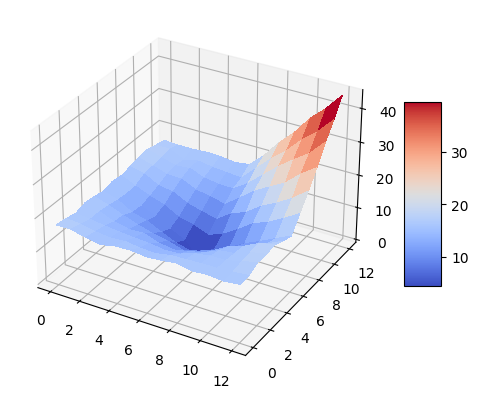

In [27]:
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = plt.axes(projection='3d')
X = np.arange(0,13)
Y = np.arange(0,13)
X, Y = np.meshgrid(X, Y)
Z = E
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [28]:
# Exercise 1

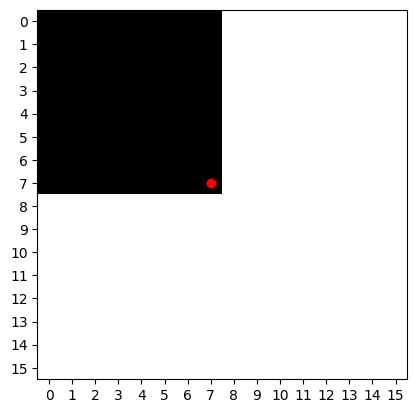

In [29]:
I = np.ones((16,16), dtype='float')
I[:8,:8] = np.zeros((8,8))
plt.imshow(I, cmap='gray')
plt.plot(7,7,'ro')
plt.yticks(np.linspace(0,15,16))
plt.xticks(np.linspace(0,15,16));

M at (7,7) =
 [[502.4  163.84]
 [163.84 502.4 ]]


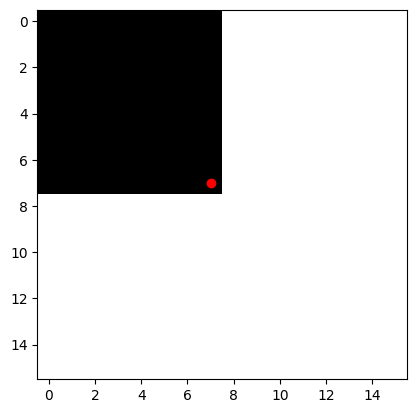

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

I = np.ones((16,16), dtype='float')
I[:8,:8] = np.zeros((8,8))
plt.imshow(I, cmap='gray')
plt.plot(7,7,'ro')

Ix = cv.Sobel(I, cv.CV_64F, 1, 0, ksize=5)
Iy = cv.Sobel(I, cv.CV_64F, 0, 1, ksize=5)

Ix2 = np.multiply(Ix,Ix)
Iy2 = np.multiply(Iy,Iy)
IxIy = np.multiply(Ix,Iy)

SIx2 = cv.blur(Ix2, (5,5)).flatten()
SIy2 = cv.blur(Iy2, (5,5)).flatten()
SIxIy = cv.blur(IxIy, (5,5)).flatten()

M = np.vstack((SIx2, SIxIy, SIxIy, SIy2 )).reshape(4,16,16)
print('M at (7,7) =\n', M[:,7,7].reshape(2,2))

In [31]:
# OpenCV Harris Corner Detection

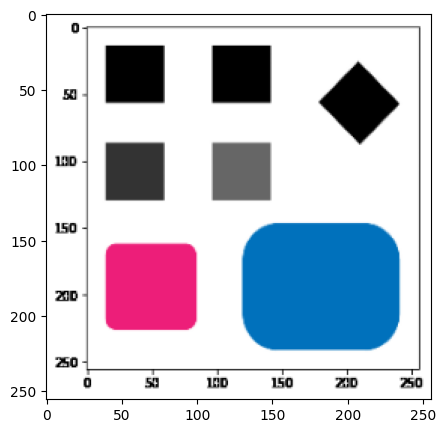

In [32]:
filename = 'data/corners-multiscale.png'
img = cv.imread(filename) 
img = cv.resize(img, (256,256))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

plt.figure(figsize=(5,5))
plt.imshow(img);

In [33]:
# Multiscale analysis for corner detection

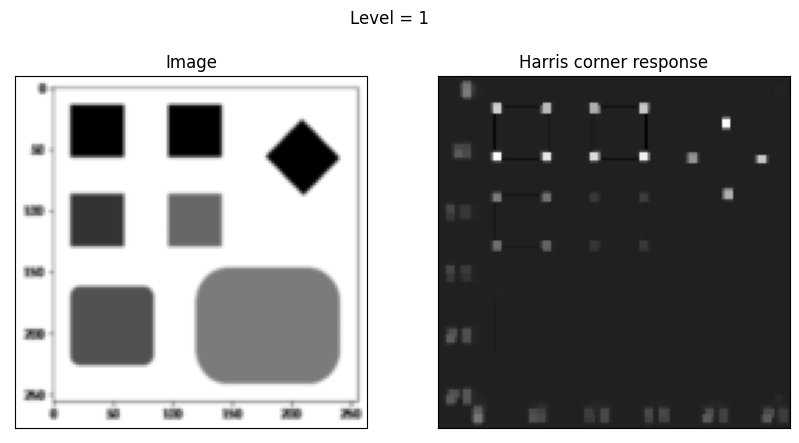

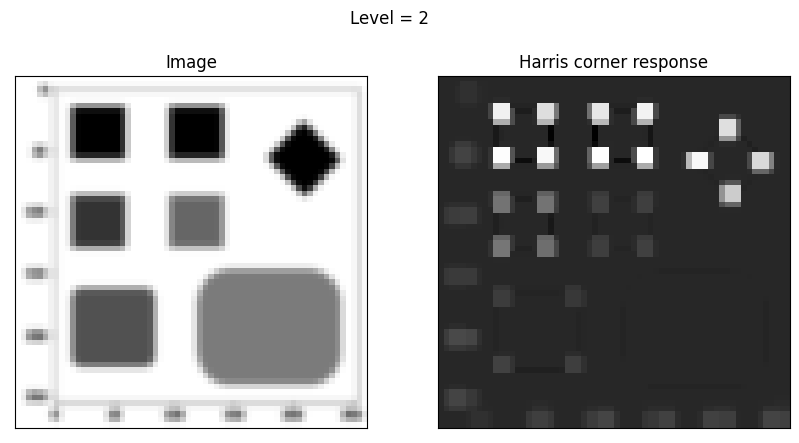

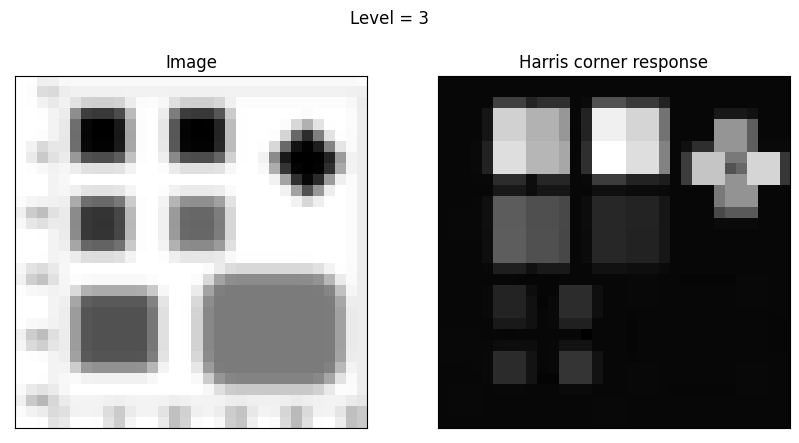

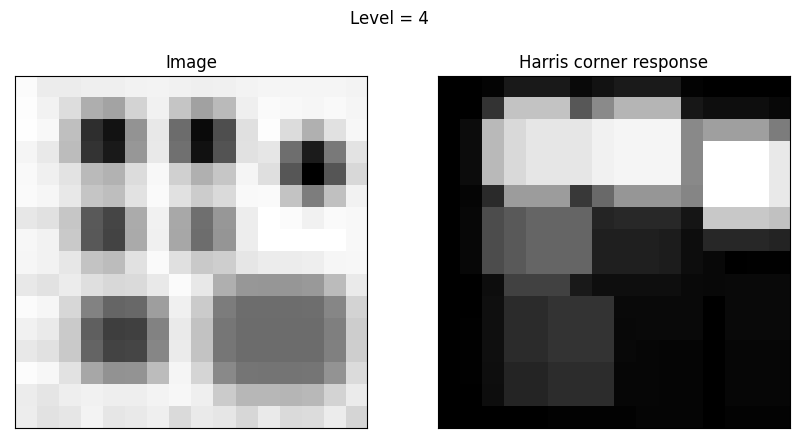

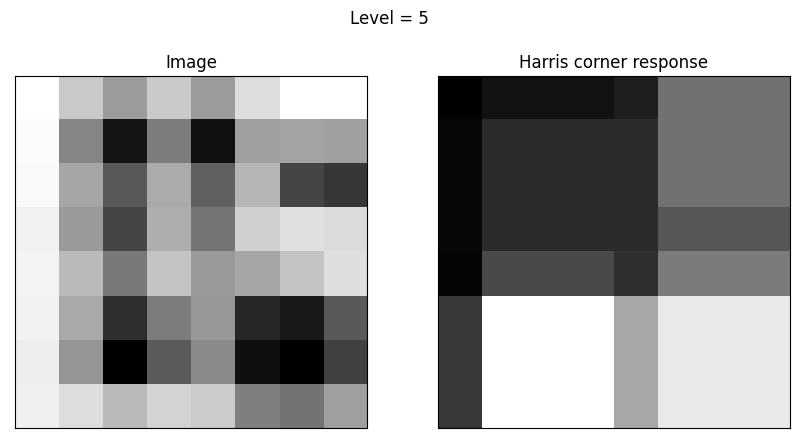

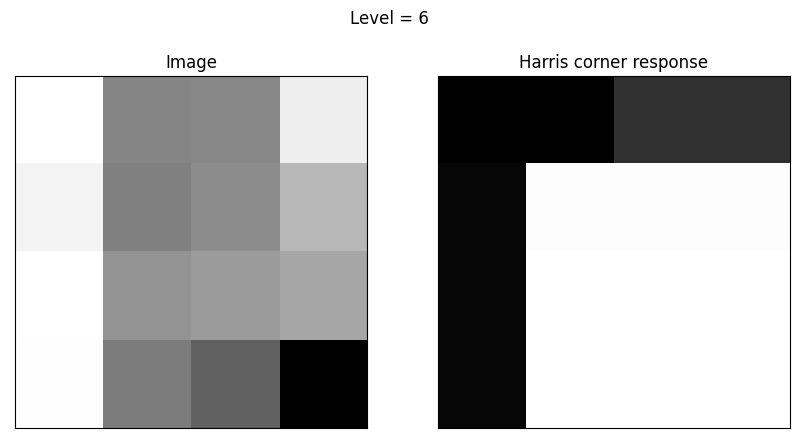

In [34]:
gray_ = np.copy(gray)
level = 0
for i in range(6):
    level = level + 1
    gray_ = cv.pyrDown(gray_)
    dst = cv.cornerHarris(gray_, 2, 3, 0.04)
    dst = cv.dilate(dst, None)
    plt.figure(figsize=(10,5))
    plt.suptitle('Level = {}'.format(level))
    plt.subplot(121)
    plt.title('Image')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(gray_, cmap='gray')
    plt.subplot(122)
    plt.title('Harris corner response')
    plt.imshow(dst, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [35]:
# Corner detection implementation

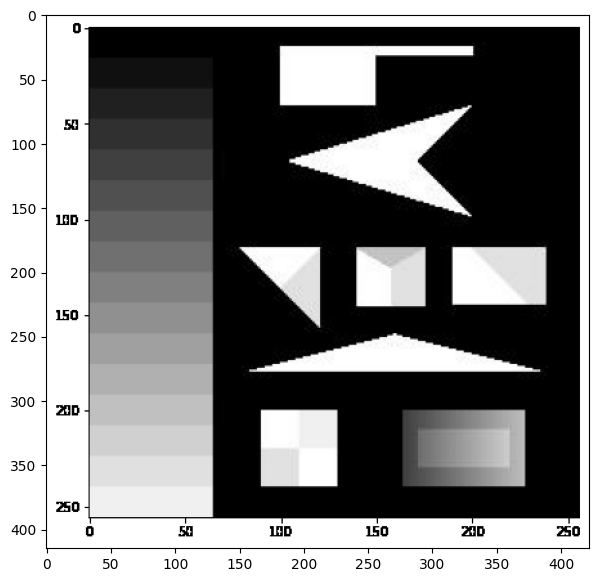

In [36]:
# Step 1 - Load image
img_bgr = cv.imread('data/corner-test.png')
img = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7,7))
plt.imshow(img);

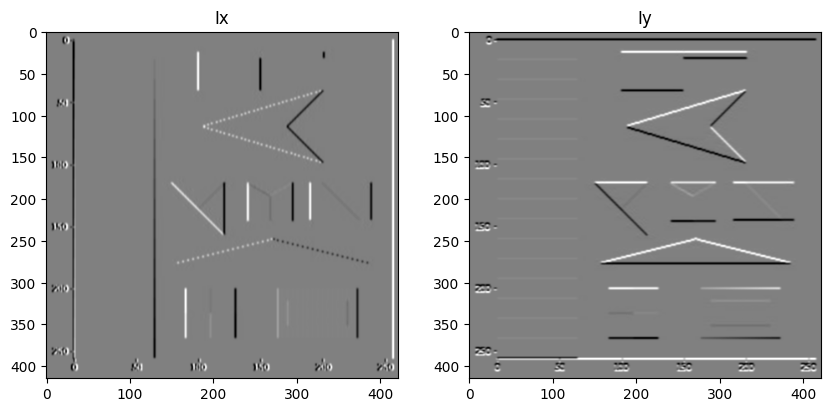

In [37]:
# Step 2 - Compute image derivatives
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
Ix = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=5)
Iy = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=5)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Ix')
plt.imshow(Ix, cmap='gray')
plt.subplot(1,2,2)
plt.title('Iy')
plt.imshow(Iy, cmap='gray');

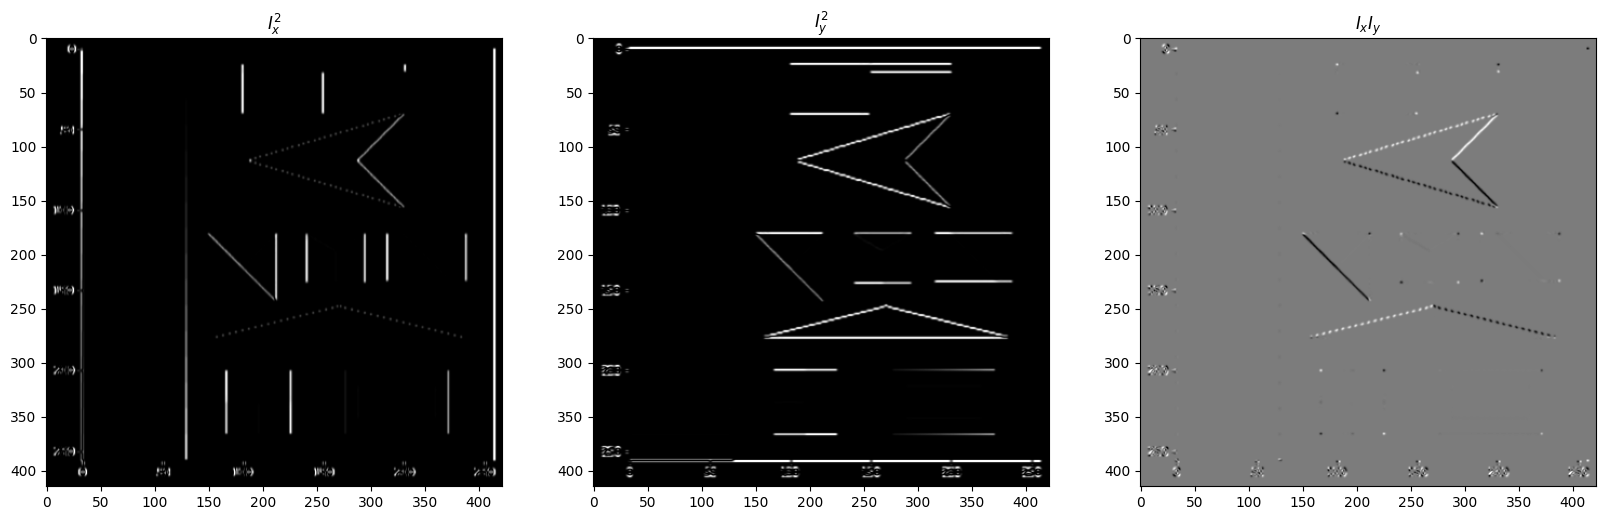

In [38]:
# Step 3 - 2-by-2 moment matrix
Ix2 = np.multiply(Ix,Ix)
Iy2 = np.multiply(Iy,Iy)
IxIy = np.multiply(Ix,Iy)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title('$I_x^2$')
plt.imshow(Ix2, cmap='gray')
plt.subplot(1,3,2)
plt.title('$I_y^2$')
plt.imshow(Iy2, cmap='gray')
plt.subplot(1,3,3)
plt.title('$I_xI_y$')
plt.imshow(IxIy, cmap='gray');

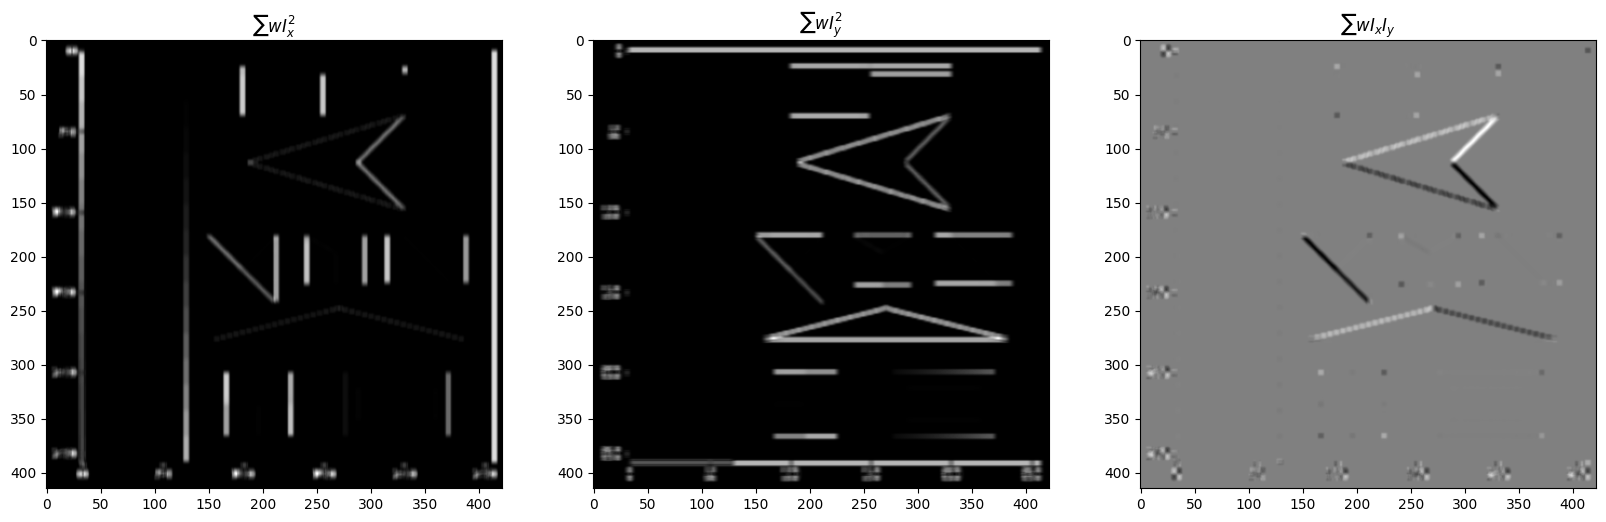

In [39]:
SIx2 = cv.blur(Ix2, (5,5))
SIy2 = cv.blur(Iy2, (5,5))
SIxIy = cv.blur(IxIy, (5,5))

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title('$\sum w I_x^2$')
plt.imshow(SIx2, cmap='gray')
plt.subplot(1,3,2)
plt.title('$\sum w I_y^2$')
plt.imshow(SIy2, cmap='gray')
plt.subplot(1,3,3)
plt.title('$\sum w I_xI_y$')
plt.imshow(SIxIy, cmap='gray');

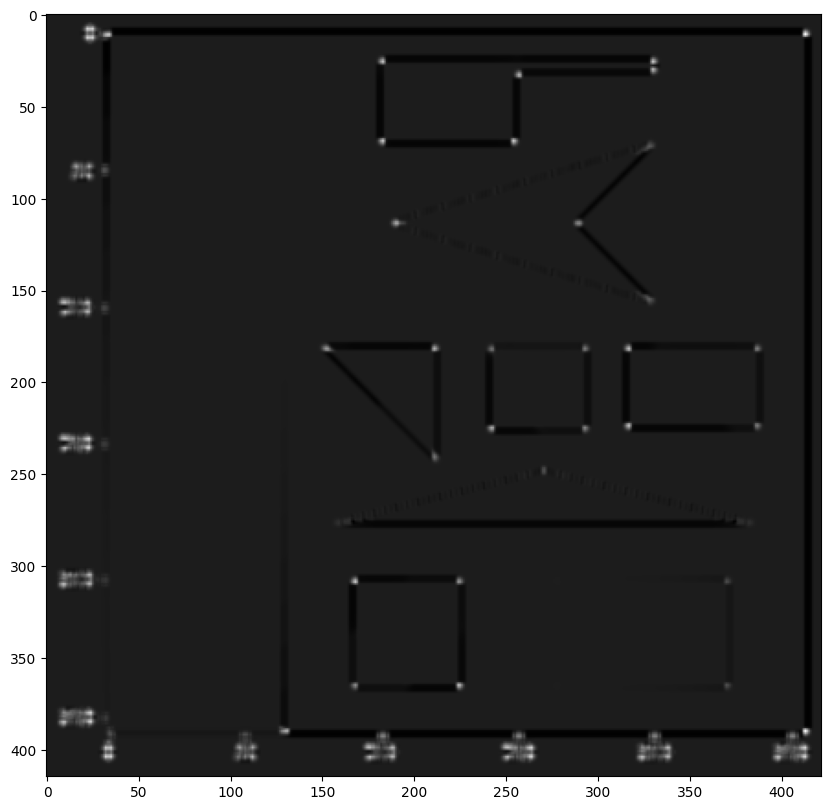

In [40]:
# Step 4 - use momement matrix eigenvalues to compute corner response
def find_corners(SIx2, SIy2, SIxIy):
    corners = []
    alpha = 0.04
    response = np.zeros(SIx2.shape, dtype='float32')
    for (x,y),_ in np.ndenumerate(SIx2):
        M = np.array([[SIx2[x,y], SIxIy[x,y]], [SIxIy[x,y], SIy2[x,y]]])
        w, _ = np.linalg.eig(M)
        response[x,y] = w[0]*w[1] - alpha*(w[0]+w[1])*(w[0]+w[1])
    return response

response = find_corners(SIx2, SIy2, SIxIy)
plt.figure(figsize=(10,10))
plt.imshow(response,cmap='gray');